# 772 Final Project

In this project, I will use the attributes (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol, and color) of red and white wine to predict the quality of wine, so this is a regression problem.

# Import methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

# Read Dataset

In [2]:
white = pd.read_csv('winequality-white.csv',sep = ';')
white.head()
# white wine has 4898 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red = pd.read_csv('winequality-red.csv',sep = ';')
red.head()
# red wine has 1599 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Prepare the data

In [4]:
print(white.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [5]:
print(red.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


As you can see, from these two datasets, there is no missing information. According to the research, the residual sugar in wines is rarely less than 1 gram/liter, and most wines' pH is between 3-4. Besides, the quality of wine is between 0 and 10.

In [6]:
# First, let's check the residual sugar
less_than_zero_white = 0
less_than_one_white = 0 
for i in white['residual sugar']:
    if i < 0:
        less_than_zore_white += 1
    elif i <= 1 and i > 0:
        less_than_one_white += 1
    else:
        continue
print('Outliers in residual sugar in white wine: ', less_than_zero_white)
print('residual sugar in white wine less than 1 gram/liter: ', less_than_one_white)

less_than_zero_red = 0
less_than_one_red = 0 
for i in red['residual sugar']:
    if i < 0:
        less_than_zore_red += 1
    elif i <= 1 and i > 0:
        less_than_one_red += 1
    else:
        continue
print('Outliers in residual sugar in red wine: ', less_than_zero_red)
print('residual sugar in red wine less than 1 gram/liter: ', less_than_one_red)


Outliers in residual sugar in white wine:  0
residual sugar in white wine less than 1 gram/liter:  170
Outliers in residual sugar in red wine:  0
residual sugar in red wine less than 1 gram/liter:  2


As you can see, there are no outliers in both red and white wines' residual sugar. And the residual sugar, which is less than 1gm/liter in red wine, is less than in white wine

In [8]:
# Second, let's check the pH, the range of pH is 0 to 14
outliers_white = 0
for i in white['pH']:
    if i < 0 or i > 14:
        outliers_white += 1
    else:
        continue
print('Outliers in pH in white wine: ',outliers_white)

outliers_red = 0
for i in red['pH']:
    if i < 0 or i > 14:
        outliers_red += 1
    else:
        continue
print('Outliers in pH in red wine: ',outliers_red)

Outliers in pH in white wine:  0
Outliers in pH in red wine:  0


In [9]:
# Third, quality
quality_white = 0
for i in white['quality']:
    if i > 10 or i < 0 :
        outliers_white += 1
    else:
        continue
print('Outliers in pH in white wine: ',quality_white)

quality_red = 0
for i in red['quality']:
    if i > 10 or i < 0 :
        outliers_red += 1
    else:
        continue
print('Outliers in pH in red wine: ',quality_red)

Outliers in pH in white wine:  0
Outliers in pH in red wine:  0


After checking data that may have outliers, I found that these two datasets are already cleaned, so I can directly use these two datasets.

In [9]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can also directly find from these two tables, there is no outlier in thses two datasets.

# Visualize the data

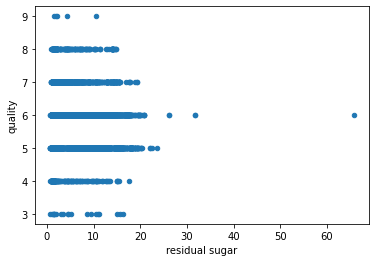

In [11]:
# relationship between white winde's residual sugar and quality 
white.plot(kind = 'scatter', x = 'residual sugar', y = 'quality')
plt.show()

Although I haven't found outliers beyond, after creating the scatter plot with residual sugar and quality, I find there is only one white wine, and the residual sugar is much higher than the others. It contains more than 60.

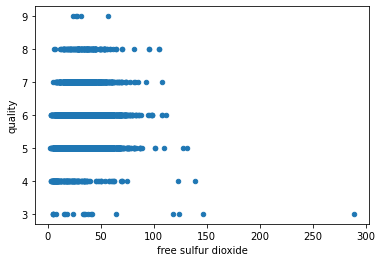

In [12]:
# relationship between white winde's free sulfur dioxide and quality 
white.plot(kind = 'scatter', x = 'free sulfur dioxide', y = 'quality')
plt.show()

Through creating all scatter plots to find the relationship between quality and attributes. I found one wine in which the free sulfur dioxide is wired, twice higher than other white wines.

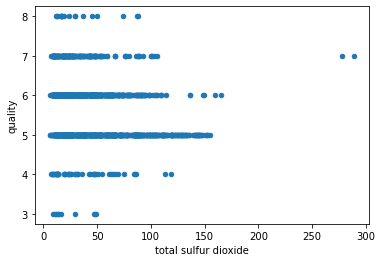

In [13]:
# relationship between red winde's total sulfur dioxide and quality 
red.plot(kind = 'scatter', x = 'total sulfur dioxide', y = 'quality')
plt.show()

After visualizing two datasets, I found a few that should be removed from the dataset, so I will process the datasets again below.


After visualizing two datasets, there are a few data I found should be removed from the dataset, so I will process the datasets again below.

# Prepare data II

After creating a few graphics, I found a few outliers, so I will process data to remove those data and merge the white wine and red wine tables. Besides, I will add color as an additional attribute to predict the quality of the wine. 0 is white wine, and 1 is red wine.

## White wine

In [10]:
# cleaned outliers in residual sugar and free sulfur dixoide
rs_white = white.drop(white[white['residual sugar'] > 60].index)
cleaned_white = rs_white.drop(rs_white[rs_white['free sulfur dioxide']>300].index)
cleaned_white.insert(11,'color',0)
cleaned_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7


## Red wine

In [11]:
## cleaned two outliers in red wine's total sulfur dioxide
cleaned_red = red.drop(red[red['total sulfur dioxide']>250].index)
cleaned_red.insert(11,'color',1)
cleaned_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,5


## Combine two tables

In [12]:
frames = [cleaned_red,cleaned_white]
cleaned_wine = pd.concat(frames)
cleaned_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7


# Create train and test sets

In this project, I will use all attributes of wine to predict the quality. I split the dataset into two groups 80% are training data, and 20% are testing data.

In [13]:
train_ratio = 0.8 # 80% for training, 30% for validation
random_seed = 42

train_dataframe = cleaned_wine.sample(frac=train_ratio, random_state=random_seed)
valid_dataframe = cleaned_wine.drop(train_dataframe.index)
print('training set size:', len(train_dataframe))
print('validation set size:', len(valid_dataframe))

training set size: 5195
validation set size: 807


In [14]:
train_X = train_dataframe.drop(columns=['quality'])
valid_X = valid_dataframe.drop(columns=['quality'])

In [15]:
train_y = train_dataframe.drop(columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                                'total sulfur dioxide','density','pH','sulphates','alcohol','color'])
valid_y = valid_dataframe.drop(columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                                'total sulfur dioxide','density','pH','sulphates','alcohol','color'])

#  First Model

My first model is linear regression. Linear regression is the basic method to make a prediction.

In [16]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression()

In [18]:
lin_scores = cross_val_score(lin_reg, train_X, train_y,
                                scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
lin_r_score = cross_val_score(lin_reg, train_X, train_y,
                                scoring="r2", cv=10)
lin_r_score

Scores: [0.76470848 0.75033062 0.70127051 0.72233122 0.75759131 0.75729597
 0.71350671 0.70332116 0.73641529 0.71338266]
Mean: 0.7320153948555037
Standard deviation: 0.022954345560951522


array([0.24285946, 0.24372999, 0.29272982, 0.32637246, 0.34127641,
       0.27017454, 0.30103023, 0.31689538, 0.32083351, 0.29080455])

For the first linear regression model, the mean MSE is 0.7320153948555037. And the highest R square in ten sets is 0.32083351. This model needs to be better because MSE is too high and R square is too low, so we need to find another model to get a better output.

# Second Model

My second model is random forest because it is a popular prediction method, introduces randomness, and avoids overfitting. And I use mean-square error to calculate the accuracy of this model. The lower the score, the better the result.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(train_X, train_y)

/var/folders/gx/14ygghxd5psd114n4d941wsw0000gn/T/ipykernel_33975/209574164.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_X, train_y)


RandomForestRegressor(random_state=42)

In [22]:
forest_scores = cross_val_score(forest, train_X, train_y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
forest_r_score = cross_val_score(forest, train_X, train_y,
                                scoring="r2", cv=10)
forest_r_score

/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection

Scores: [0.62779958 0.66448274 0.55825019 0.59189883 0.66407802 0.64532064
 0.58336807 0.56260627 0.62817717 0.60436052]
Mean: 0.6130342019928237
Standard deviation: 0.03699789602379698


/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection

array([0.48969865, 0.40688495, 0.55179991, 0.54768392, 0.49385907,
       0.4700452 , 0.53275186, 0.56289176, 0.50580888, 0.4910056 ])

Then I will use grid serach to find a better combination of parameters than the period one

In [70]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=0)
rf_params = {
    'n_estimators': [100, 150],
     'criterion':['squared_error', 'poisson'],
}
# Define the gridsearchCV
rf_grid = GridSearchCV(rf, rf_params)
# fit with the tranformed sparse matrix
rf_grid.fit(train_X, train_y)
print('Best Score:', rf_grid.best_score_)
# assign the best estimator to a .0variable
best_rf = rf_grid.best_estimator_
print('Best Params:', rf_grid.best_params_)

/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection

Best Score: 0.49331472512959607
Best Params: {'criterion': 'poisson', 'n_estimators': 150}


In [23]:
forest1 = RandomForestRegressor(criterion= 'poisson',n_estimators= 150)
forest1.fit(train_X, train_y)

/var/folders/gx/14ygghxd5psd114n4d941wsw0000gn/T/ipykernel_33975/60622051.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(train_X, train_y)


RandomForestRegressor(criterion='poisson', n_estimators=150)

Next, we can evaluate the Random Forest model using cross validation.

In [24]:
forest1_scores = cross_val_score(forest1, train_X, train_y,
                                scoring="neg_mean_squared_error", cv=10)
forest1_rmse_scores = np.sqrt(-forest1_scores)
display_scores(forest1_rmse_scores)
forest1_r_score = cross_val_score(forest1, train_X, train_y,
                                scoring="r2", cv=10)
forest1_r_score

/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection

Scores: [0.61528431 0.66708423 0.55430414 0.59213023 0.65947279 0.64313645
 0.58670506 0.56312049 0.62779187 0.6042806 ]
Mean: 0.6113310156118666
Standard deviation: 0.036503918732712935


/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuangyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection

array([0.50874536, 0.40338658, 0.55959133, 0.54427347, 0.50200985,
       0.47950199, 0.52632713, 0.56431147, 0.50791508, 0.49461503])

# Evaluate Second Model

For the random forest, I first ran this model without adding any parameters, and after cross-fold validation, I got the baseline result. The mean of MSE is 0.6130342019928237. The highest R square is 0.56289176. Then I used the grid search to find a better combination of parameters, and the result of cross-validation is the mean of MSE is 0.6113310156118666. The highest R square is 0.56431147. As we can see, the mean MSE of the model with parameters is lower than the baseline, which is better than the model without any parameters.

# Compare the performance of model 1 and model 2

After training two models, linear regression and random forest, I found that random forest is better than linear regression. The MSE of the random forest is lower than the linear regression, and the R square is also higher than it. Hence, I will use a random forest model to solve this project's problems continuously.

# Final Model

For the final model, I will add a new computed feature that calculates the ratio between fixed acidity and residual sugar. And I will still use a random forest regressor.

In [25]:
train_X['Fixed_acidity_Sugar_ratio'] = train_X['fixed acidity'] / train_X['residual sugar']
train_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,Fixed_acidity_Sugar_ratio
1503,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.6,0,1.478261
654,6.5,0.21,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,0,2.600000
98,9.8,0.36,0.46,10.5,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,0,0.933333
1178,9.8,0.44,0.40,2.8,0.036,35.0,167.0,0.99560,2.97,0.39,9.2,0,3.500000
1438,7.0,0.59,0.00,1.7,0.052,3.0,8.0,0.99600,3.41,0.47,10.3,1,4.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,6.7,0.48,0.49,2.9,0.030,28.0,122.0,0.98926,3.13,0.40,13.0,0,2.310345
3245,7.6,0.27,0.29,2.5,0.059,37.0,115.0,0.99328,3.09,0.37,9.8,0,3.040000
1997,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,0,0.711864
323,6.8,0.28,0.44,9.3,0.031,35.0,137.0,0.99460,3.16,0.36,10.4,0,0.731183


In [26]:
valid_X['Fixed_acidity_Sugar_ratio'] = valid_X['fixed acidity'] / valid_X['residual sugar']
valid_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,Fixed_acidity_Sugar_ratio
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,1,2.888889
66,7.5,0.520,0.11,1.5,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,1,5.000000
125,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,1,4.736842
127,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,1,4.500000
137,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.2,1,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,7.4,0.220,0.26,1.2,0.035,18.0,97.0,0.99245,3.12,0.41,9.7,0,6.166667
4882,5.5,0.320,0.13,1.3,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0,4.230769
4884,6.5,0.330,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,0,0.783133
4888,6.8,0.220,0.36,1.2,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,0,5.666667


In [35]:
forest2 = RandomForestRegressor(criterion= 'poisson',n_estimators= 150)
forest2.fit(train_X, train_y)

/var/folders/gx/14ygghxd5psd114n4d941wsw0000gn/T/ipykernel_33975/4117239677.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(train_X, train_y)


RandomForestRegressor(criterion='poisson', n_estimators=150)

In [36]:
y_test_pred = forest2.predict(valid_X)
score = mean_squared_error(valid_y,y_test_pred)
score

0.33564422414980033

In [37]:
y_test_pred = forest2.predict(valid_X)
score1 = r2_score(valid_y,y_test_pred)
score1

0.5473357079153656

# Evaluate Final Model


After calculating, we can see that the random forest regressor works not badly. The MSE is 0.33564422414980033, which is lower than the MSE of the second model. It means the final model performs better when it makes a prediction. Besides, the highest R square is 0.5473357079153656, which reached the highest score in this project. Hence, this model performs pretty well.

# Reflect on the performance of the final model

What other ideas do you have about possible ways to improve performance?
What types of instances does it perform well on?
Which does it not perform well on?
What were the main challenges that you faced while working on this project?

To improve performance, I can try other regression models, like logistic regression and decision tree, and use grid search to try all parameters and find the best combination. Logistic regression performs well when it is used to predict the categorical dependent variable. And decision tree model is used for handling non-linear data sets. However, the decision tree model is less effective in predicting the outcome of a continuous variable. In this project, the challenge was adjusting parameters, I tried to set all parameters to find the best combination, but it cost me hours, even a day, and I did not get the answer. Hence, I deleted some parameters and did not train them. So, the model doesn't perform best.